# Analisis Profit Fitness
Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik yang mereka himpun.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳 󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 Bagaimana ya cara mengetahui apakah pelanggan sudah berhenti menggunakan layanan?󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀦󠀳󠀰 Bisa saja dengan menghitung tingkat churn berdasarkan jumlah orang yang menghapus akun atau tidak memperbarui kontrak langganan mereka.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀧󠀳󠀰 Namun terkadang, tidak dapat diketahui dengan pasti apakah seorang klien benar-benar sudah berhenti.

󠀰Bagi bisnis pusat kebugaran, pelanggan akan dianggap pergi kalau mereka tidak lagi kembali selama satu bulan lamanya.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀢󠀳󠀰 Padahal, hal itu belum tentu benar. Seorang pelanggan bisa saja tidak mengunjungi pusat kebugaran selama satu bulan karena dia sedang berlibur, dan akan kembali mengunjungi pusat kebugaran setelah liburannya usai. Namun, kasus seperti ini memang jarang sekali terjadi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀣󠀳󠀰 Biasanya jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar pelanggan tersebut memang tidak akan kembali lagi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀤󠀳 󠀰Untuk mengurangi tingkat churn, Model Fitness menerapkan digitalisasi terhadap sejumlah profil pelanggan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 

Proyek kali ini bertujuan untuk menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀦󠀳󠀰 Untuk itu, ada beberapa hal yang harus dilakukan yaitu:
- Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
- Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
- Menganalisis faktor yang paling memengaruhi churn
- Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
- Mengidentifikasi kelompok yang ditargetkan
- Merekomendasikan langkah-langkah untuk mengurangi churn
- Mendeskripsikan pola lain yang kamu temui terkait interaksi pelanggan


## Pemuatan Data
Langkah pertama yaitu memuat dataset dan library yang dibutuhkan.

In [1]:
# import library yang dibutuhkan
import pandas as pd 
import numpy as np
import warnings

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# mengunduh dataset
try:
    df = pd.read_csv(
        r'C:\Users\Adam\OneDrive\Course\TripleTen\Sprint 12\gym_churn_us.csv', 
    )
    
except:
    df = pd.read_csv(
        '/datasets/gym_churn_us.csv'
    )

In [4]:
# memeriksa ukuran dataset
df.shape

(4000, 14)

In [5]:
# melihat informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Model Fitness menyediakan file CSV yang berisi data tingkat churn pelanggan untuk bulan tertentu dan informasi tentang bulan sebelumnya.󠀲󠀡󠀥󠀥󠀧󠀨󠀠󠀨󠀳󠀰 Dataset ini mencakup kolom-kolom berikut:
- `Churn` — churn aktual untuk bulan terkait

Data pengguna untuk bulan sebelumnya
- `gender` - memuat gender pengguna
- `Near_Location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
- `Partner` — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
- `Promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
- `Phone` — apakah pengguna memberikan nomor telepon mereka
- `Age` - memuat umur pengguna
- `Lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran

Data dari log kunjungan dan pembelian, serta data terkait status keanggotaan saat ini
- `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
- `Month_to_end_contract` — sisa bulan sebelum kontrak berakhir
- `Group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok
- `Avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
- `Avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
- `Avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

Dataset yang digunakan memuat 4000 baris tanpa ada nilai yang hilang. Berikut 10 baris sampel dari dataset.

In [7]:
# menampilkan 10 baris sampel dataset
df.sample(10)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
3054       0              1        0              0      1                1   
961        1              1        1              0      1                1   
3705       0              1        0              0      1                1   
2462       1              0        1              0      1                1   
770        1              1        0              0      1                1   
499        1              1        0              0      1                6   
2822       0              1        0              1      1                1   
1516       0              1        0              0      1                1   
2992       0              1        1              1      1                1   
2388       1              1        0              1      1               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
3054             0   35                    187.673155                    1.0   
961              0   34                     21.794636                    1.0   
3705             0   29                     60.885977                    1.0   
2462             0   32                     84.282561                    1.0   
770              0   31                     67.948942                    1.0   
499              0   27                     50.024629                    6.0   
2822             0   28                    208.502834                    1.0   
1516             1   27                     12.100221                    1.0   
2992             1   27                    365.027518                    1.0   
2388             1   31                    208.846277                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
3054        11                   1.376788                           1.277898   
961          8                   1.392759                           1.389592   
3705         5                   0.000000                           0.000000   
2462         5                   2.036743                           2.249659   
770          2                   1.114127                           1.136693   
499          2                   2.826340                           2.932442   
2822         0                   2.305537                           1.923776   
1516         0                   1.694470                           1.014494   
2992         3                   4.531969                           4.779963   
2388        10                   2.276956                           2.127821   

      Churn  
3054      0  
961       0  
3705      1  
2462      0  
770       0  
499       0  
2822      1  
1516      1  
2992      0  
2388      0

## Analisis Data Eksploratif
Pada tahap ini hal yang harus dilakukan yaitu:
- Mempelajari nilai rata-rata dan standar deviasinya.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀡󠀳
- Meihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar (churn) dan untuk mereka yang tinggal.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀢󠀳
- Membuat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀣󠀳
- Membuat matriks korelasi dan tampilkan hasilnya.

In [8]:
# melihat perhitungan statistik pada tabel
df.describe().applymap("{0:.2f}".format)

gender Near_Location  Partner Promo_friends    Phone Contract_period  \
count  4000.00       4000.00  4000.00       4000.00  4000.00         4000.00   
mean      0.51          0.85     0.49          0.31     0.90            4.68   
std       0.50          0.36     0.50          0.46     0.30            4.55   
min       0.00          0.00     0.00          0.00     0.00            1.00   
25%       0.00          1.00     0.00          0.00     1.00            1.00   
50%       1.00          1.00     0.00          0.00     1.00            1.00   
75%       1.00          1.00     1.00          1.00     1.00            6.00   
max       1.00          1.00     1.00          1.00     1.00           12.00   

      Group_visits      Age Avg_additional_charges_total  \
count      4000.00  4000.00                      4000.00   
mean          0.41    29.18                       146.94   
std           0.49     3.26                        96.36   
min           0.00    18.00                         0.15   
25%           0.00    27.00                        68.87   
50%           0.00    29.00                       136.22   
75%           1.00    31.00                       210.95   
max           1.00    41.00                       552.59   

      Month_to_end_contract Lifetime Avg_class_frequency_total  \
count               4000.00  4000.00                   4000.00   
mean                   4.32     3.72                      1.88   
std                    4.19     3.75                      0.97   
min                    1.00     0.00                      0.00   
25%                    1.00     1.00                      1.18   
50%                    1.00     3.00                      1.83   
75%                    6.00     5.00                      2.54   
max                   12.00    31.00                      6.02   

      Avg_class_frequency_current_month    Churn  
count                           4000.00  4000.00  
mean                               1.77     0.27  
std                                1.05     0.44  
min                                0.00     0.00  
25%                                0.96     0.00  
50%                                1.72     0.00  
75%                                2.51     1.00  
max                                6.15     1.00

Pada tabel perhitungan statistik di atas dapat diketahui bahwa:
- Jumlah pelanggan laki-laki sebanyak 51% sedangkan wanita 49%.
- Sebanyak 85% pelanggan bertempat tinggal dekat dengan Model Fitness.
- Jumlah pelanggan yang berasal dari partner bisnis sebesar 49%.
- 31% pelanggan menggunakan kode promo yang diberikan oleh temannya saat mendaftar.
- Pelanggan yang berpartisipasi dalam sesi grup atau kelas kebugaran sebanyak 41%.
- Rata-rata umur pelanggan yaitu umur 29 tahun.
- Sebagian besar pelanggan menjadi anggota selama 1 bulan dan melakukan 2 kali kunjungan di setiap minggu.
- Sebanyak 27% pelanggan berhenti mengunjungi layanan Model Fitness.

### Rata-rata Fitur Dua Kelompok

In [9]:
# melihat rata-rata dua kelompok pelanggan
df.groupby('Churn').mean().applymap("{0:.2f}".format)

gender Near_Location Partner Promo_friends Phone Contract_period  \
Churn                                                                    
0       0.51          0.87    0.53          0.35  0.90            5.75   
1       0.51          0.77    0.36          0.18  0.90            1.73   

      Group_visits    Age Avg_additional_charges_total Month_to_end_contract  \
Churn                                                                          
0             0.46  29.98                       158.45                  5.28   
1             0.27  26.99                       115.08                  1.66   

      Lifetime Avg_class_frequency_total Avg_class_frequency_current_month  
Churn                                                                       
0         4.71                      2.02                              2.03  
1         0.99                      1.47                              1.04

Pada tabel di atas dapat diketahui bahwa :
- Jenis kelamin tidak berdampak sama sekali kepada pelanggan yang meninggalkan layanan.
- Pelanggan yang bertempat tinggal jauh dari Model Fitness lebih cenderung meninggalkan layanan.
- Pelanggan yang menggunakan kode promo dari temannya atau rujukan cenderung tetap menggunakan layanan.
- Pelanggan yang berpartisipasi dalam sesi grup atau kelas cenderung tetapa menggunakan layanan.
- Rata-rata usia pelanggan yang tetap menggunakan layanan yaitu 30 tahun. Sementara rata-rata usia pelanggan yang meninggalkan layanan berumur 27 tahun.
- Pelanggan yang meninggalkan layanan sangat jarang untuk mengunjungi Model Fitness yaitu 1 kunjungan tiap minggu dibandingkan dengan pelanggan yang tetap menggunakan layanan dengan 2 kunjungan tiap minggu.
- Sebagian besar pelanggan yang meninggalkan layanan memiliki rata-rata durasi keanggotaan lebih pendek yaitu 1 bulan dibandingkan dengan pelanggan yang tetap menggunakan layanan dengan durasi sekitar 5 bulan.

### Distribusi Pelanggan

In [10]:
# membuat loop untuk menampilkan grafik histogram
for column in df.columns[:-1]:  
    fig = px.histogram(
        df, 
        x=column, 
        color='Churn', 
        marginal='box', 
        nbins=30, 
        opacity=0.60, 
        width = 600, 
        height= 400, 
        title=f'Histogram dan Distribusi {column} ')
    fig.show()

Berikut beberapa temuan penting dari grafik di atas yaitu:
- Gender tampaknya tidak memberikan dampak yang signifikan terhadap perilaku churn.
- Meskipun terdapat dugaan bahwa pelanggan yang memiliki tempat tinggal dekat dengan gym dan mendaftarkan nomor ponselnya bisa mempengaruhi churn, hal ini sulit untuk ditentukan karena sebagian besar pelanggan tinggal di dekat gym dan juga mendaftarkan nomor ponsel mereka.
- Pelanggan yang bukan karyawan perusahaan mitra cenderung memiliki risiko churn yang lebih tinggi dibandingkan dengan pelanggan yang merupakan karyawan mitra.
- Pelanggan yang tidak direkomendasikan oleh teman memiliki kecenderungan lebih besar untuk churn dibandingkan dengan pelanggan yang direkomendasikan oleh teman.
- Pelanggan dengan periode kontrak yang lebih pendek cenderung lebih mungkin melakukan churn dibandingkan dengan mereka yang memiliki kontrak jangka panjang.
- Pelanggan yang tidak berpartisipasi dalam sesi grup lebih cenderung melakukan churn dibandingkan dengan mereka yang berpartisipasi.
- Baik pelanggan yang melakukan churn maupun stay memiliki rentang usia yang hampir sama yaitu 16 tahun, namun pelanggan yang stay cenderung lebih tua.
- Pelanggan yang bertahan cenderung membelanjakan/berinvestasi lebih banyak secara finansial dibandingkan pelanggan yang berhenti.
- Pelanggan yang tetap menginvestasikan lebih banyak waktu di gym dan memiliki frekuensi kunjungan yang lebih tinggi dibandingkan pelanggan yang berhenti.
- Batas atas seumur hidup untuk pelanggan yang churn adalah 2 bulan, dengan beberapa outlier mencapai hingga 9 bulan, sedangkan mereka yang bertahan memiliki batas atas 1 tahun, dengan banyak outlier atas. Beberapa pelanggan bahkan memiliki masa hidup 31 bulan, - menunjukkan loyalitas yang tinggi.
- Mayoritas dari mereka yang melakukan churn hanya memiliki sisa keanggotaan selama 1 bulan atau kurang, sedangkan mereka yang bertahan memiliki sisa keanggotaan yang lebih lama, hingga 1 tahun.

### Matriks Korelasi dengan Heatmap

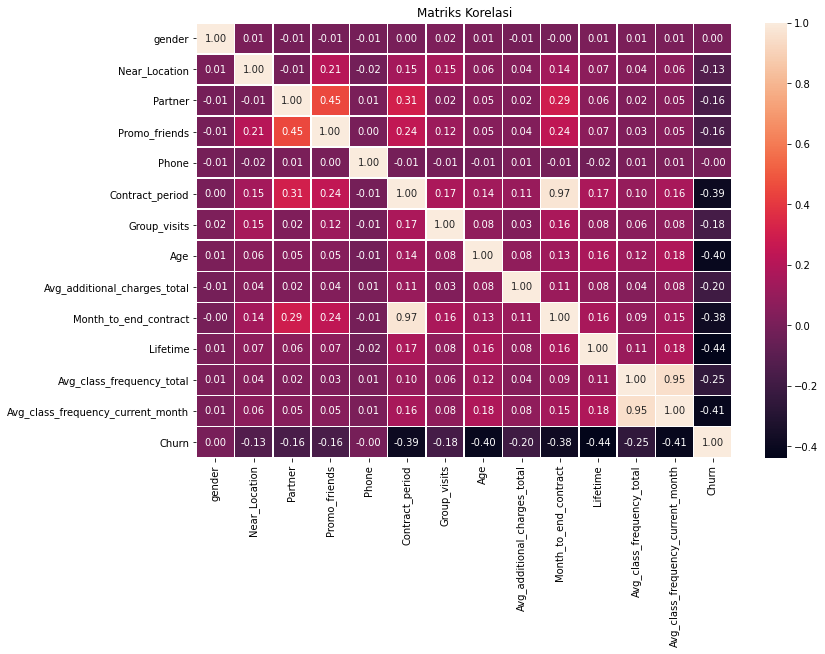

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

Dari grafik heatmap di atas, dapat diketahui bahwa:
- Terdapat korelasi negatif sedang antara Churn dan periode Kontrak, Usia, Bulan hingga akhir kontrak, Seumur Hidup, dan Frekuensi kelas rata-rata untuk bulan tertentu.
- Korelasi negatif antara churn dan fitur-fitur ini menunjukkan bahwa pelanggan dengan periode kontrak yang lebih lama, usia yang lebih tua, sisa keanggotaan yang lebih lama, masa pakai yang lebih lama, dan frekuensi kelas rata-rata yang lebih tinggi cenderung tidak melakukan churn.

## Membuat Model untuk Meprediksi Churn Pelanggan
󠀰Pada tahap ini membuat model klasifikasi biner untuk pelanggan, di mana fitur targetnya adalah pengguna yang akan keluar bulan depan.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀧󠀳 Langkah-langkahnya yaitu sebagai berikut:
- Membagi datanya menjadi train set dan validation set.
- Melatih model pada train set dengan dua metode berikut: regresi logistik, random forest
- Mengevaluasi accuracy, precision, dan recall untuk kedua model menggunakan validation set.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀢󠀳󠀰 

Lalu menggunakan metrik-metrik tersebut untuk membandingkan model yaitu sebagai berikut:
- Accuracy: mengukur proporsi instance yang diklasifikasikan dengan benar dari semua instance. Penting untuk mengevaluasi kinerja model secara keseluruhan.
- Precision: mengukur proporsi positif sebenarnya (pelanggan churn yang diprediksi dengan tepat) dari semua pelanggan churn yang diprediksi. Penting untuk mengevaluasi keandalan prediksi positif.
- Recall: mengukur proporsi positif sebenarnya dari semua pelanggan yang berhenti berlangganan. Penting untuk mengevaluasi sensitivitas model dalam mendeteksi pelanggan yang berhenti berlangganan.
- F1 Score: menggabungkan presisi dan perolehan menjadi satu metrik yang menyeimbangkan kedua ukuran. Hal ini berguna ketika presisi dan perolehan sama pentingnya.
- ROC AUC Score: mengukur kemampuan model untuk membedakan kelas positif dan negatif. Hal ini sangat berguna ketika kumpulan data tidak seimbang.

In [17]:
# membagi data target dan fitur
X = df.drop('Churn', axis=1)
y = df['Churn']

In [18]:
# membagi data train dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# membuat fungsi untuk membandingkan dua model ML
def print_all_metrics(y_true, y_pred, y_proba, title = 'Metrik klasifikasi'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [20]:
# list model yang akan digunakan
models = [
    LogisticRegression(max_iter=1000, random_state=0),
    RandomForestClassifier(random_state = 0)
]

In [21]:
# loop untuk membandingkan kedua model
for m in models:
    model = m
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:,1]
    predictions = model.predict(X_test)
    print(m)
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.3f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.3f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.3f}'.format(f1_score(y_test, predictions)))
    print('ROC_AUC: {:.3f}'.format((roc_auc_score(y_test, probabilities))))
    print()

LogisticRegression(max_iter=1000, random_state=0)
Accuracy: 0.924
Precision: 0.859
Recall: 0.828
F1: 0.843
ROC_AUC: 0.971

RandomForestClassifier(random_state=0)
Accuracy: 0.916
Precision: 0.839
Recall: 0.818
F1: 0.829
ROC_AUC: 0.968



Perbedaan antara kedua model tersebut tampaknya cukup kecil. Model yang dipilih akurasi keseluruhan metrik, yaitu model Regresi Logistik karena memiliki akurasi yang sedikit lebih tinggi. Saatnya untuk memprediksi perilaku pelanggan untuk bulan depan dengan model Regresi Logistik.

In [23]:
# membuat model regresi logistik
final_model = LogisticRegression(max_iter=1000, random_state=0)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
X

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  
0            3                   0.020398                           0.000000  
1            7                   1.922936                           1.910244  
2            2                   1.859098                           1.736502  
3            2                   3.205633                           3.357215  
4            3                   1.113884                           1.120078  
...        ...                        ...                                ...  
3995         8                   2.284497                           2.349070  
3996         1                   1.277168                           0.292859  
3997         2                   2.786146                           2.831439  
3998         3                   1.630108                           1.596237  
3999         1                   1.101832                           1.035270  

[4000 rows x 13 columns]

In [24]:
# menciptakan DataFrame yang memuat nama-nama fitur dan koefisien
coefficients_df = pd.DataFrame({'feature': X.columns, 'coefficient': final_model.coef_[0]})
coefficients_df['abs_coefficient'] = coefficients_df['coefficient'].abs()  # Tambahkan kolom untuk nilai absolut

# mengurutkan DataFrame berdasarkan nilai absolut koefisien
coefficients_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False)

# menampilkan 10 fitur dengan pengaruh tertinggi
coefficients_df

feature  coefficient  abs_coefficient
12  Avg_class_frequency_current_month    -4.290351         4.290351
11          Avg_class_frequency_total     3.445721         3.445721
10                           Lifetime    -1.078864         1.078864
6                        Group_visits    -0.798567         0.798567
3                       Promo_friends    -0.597553         0.597553
7                                 Age    -0.345852         0.345852
1                       Near_Location    -0.213422         0.213422
5                     Contract_period    -0.169020         0.169020
2                             Partner    -0.162195         0.162195
9               Month_to_end_contract    -0.122313         0.122313
0                              gender    -0.031135         0.031135
4                               Phone     0.007148         0.007148
8        Avg_additional_charges_total    -0.005849         0.005849

Fitur-fitur yang paling penting berdasarkan tabel di atas yaitu Avg_class_frequency_current_month, Avg_class_frequency_total, Phone, dan Lifetime. Dengan nilai koefisien di atas 90%.

In [25]:
# membuat tabel prediksi hasil model
final_check = X_test.copy()
final_check['Target'] = y_test
final_check['Prediksi'] = y_pred

In [26]:
# menampilkan hasil prediksi dari model yang telah dilatih
final_check.info()
final_check.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2230 to 299
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             800 non-null    int64  
 1   Near_Location                      800 non-null    int64  
 2   Partner                            800 non-null    int64  
 3   Promo_friends                      800 non-null    int64  
 4   Phone                              800 non-null    int64  
 5   Contract_period                    800 non-null    int64  
 6   Group_visits                       800 non-null    int64  
 7   Age                                800 non-null    int64  
 8   Avg_additional_charges_total       800 non-null    float64
 9   Month_to_end_contract              800 non-null    float64
 10  Lifetime                           800 non-null    int64  
 11  Avg_class_frequency_total          800 non-null    floa

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
1791       1              0        0              0      1                1   
940        1              1        0              0      0                1   
1281       1              1        1              0      1               12   
3917       1              1        1              0      0               12   
3554       1              1        1              1      1                1   
3218       1              1        1              0      1                6   
3633       1              1        1              0      1                1   
10         0              1        0              0      0                6   
1359       0              1        1              1      0               12   
3881       0              1        1              0      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
1791             0   34                    224.208611                    1.0   
940              1   32                     89.985058                    1.0   
1281             0   28                    170.758075                   12.0   
3917             0   33                    205.496611                   12.0   
3554             0   29                      9.469089                    1.0   
3218             1   31                     66.259463                    5.0   
3633             0   31                     74.740298                    1.0   
10               1   32                    229.708945                    6.0   
1359             1   27                    300.504904                   12.0   
3881             0   26                     61.518167                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
1791         2                   3.317759                           3.386540   
940          1                   2.064166                           2.101239   
1281         6                   2.917536                           2.826472   
3917         2                   0.543005                           0.566156   
3554         2                   3.106344                           3.167587   
3218         7                   3.358980                           3.346650   
3633         3                   1.103398                           0.950818   
10           3                   1.641180                           1.367714   
1359         1                   1.622228                           1.801673   
3881         0                   3.075096                           2.425953   

      Target  Prediksi  
1791       0         0  
940        0         0  
1281       0         0  
3917       0         0  
3554       0         0  
3218       0         0  
3633       0         0  
10         0         0  
1359       0         0  
3881       1         1

Terdapat 800 baris hasil prediksi dari model yang sudah dilatih. Akan tetapi, sepertinya ada beberapa baris dengan prediksi yang salah. 

In [27]:
# melihat hasil kesalahan prediksi
final_check[final_check['Target'] != final_check['Prediksi']]

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
1150       0              1        0              0      1                1   
2800       0              1        0              0      1                1   
1746       0              1        1              1      1                6   
3463       0              1        0              0      1                1   
3295       1              1        1              0      1                1   
...      ...            ...      ...            ...    ...              ...   
3456       0              1        1              1      1                1   
1185       1              1        0              0      1                1   
2911       1              1        0              0      1                1   
2966       0              1        1              1      1                1   
3538       1              1        0              1      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
1150             0   27                     93.006365                    1.0   
2800             0   32                    233.471320                    1.0   
1746             0   27                    179.048374                    5.0   
3463             0   33                     14.852519                    1.0   
3295             0   27                     40.308361                    1.0   
...            ...  ...                           ...                    ...   
3456             1   26                    116.748540                    1.0   
1185             1   31                    169.870854                    1.0   
2911             0   28                    243.861885                    1.0   
2966             0   30                    127.859156                    1.0   
3538             0   30                     31.326670                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
1150         1                   1.777851                           2.347247   
2800         2                   1.439025                           1.076683   
1746         0                   1.531032                           2.011963   
3463         3                   0.055140                           0.000000   
3295         3                   2.107138                           2.208087   
...        ...                        ...                                ...   
3456         4                   1.581822                           1.423033   
1185         2                   1.214657                           0.911090   
2911         0                   2.899244                           3.167248   
2966         1                   0.517503                           0.522702   
3538         0                   2.746111                           3.089225   

      Target  Prediksi  
1150       1         0  
2800       1         0  
1746       1         0  
3463       1         0  
3295       1         0  
...      ...       ...  
3456       1         0  
1185       1         0  
2911       1         0  
2966       0         1  
3538       1         0  

[61 rows x 15 columns]

Seperti pada tabel di atas, terdapat 61 baris salah prediksi. Kesalahan prediksi seperti ini bisa sangat mempengaruhi strategi bisnis yang akan dijalankan. Untuk itu, pisahkan data dengan prediksi yang benar saja dan menyimpannya dalam tabel baru

In [28]:
# memisahkan data prediksi hasil model
final_predict = final_check[final_check['Target'] == final_check['Prediksi']]

# menampilkan 10 baris data
final_predict.sample(10)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
226        1              1        1              0      1                1   
3746       1              1        0              1      1                1   
1098       0              1        1              1      1                1   
2501       0              0        0              0      1                1   
2347       1              0        1              0      1                6   
2049       0              1        1              1      1               12   
3196       0              1        0              0      1                6   
546        0              1        1              1      0               12   
3859       1              1        0              0      1               12   
3171       1              1        1              0      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
226              1   32                    207.166209                    1.0   
3746             1   32                     83.808096                    1.0   
1098             1   35                     32.683308                    1.0   
2501             0   33                    182.960514                    1.0   
2347             0   25                    224.600016                    3.0   
2049             1   30                    102.700807                   12.0   
3196             1   30                    115.763957                    6.0   
546              1   27                     73.767763                   12.0   
3859             1   24                    207.611170                   11.0   
3171             0   34                      8.698360                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
226          3                   2.954808                           2.969611   
3746         3                   2.176718                           2.203311   
1098         3                   2.756866                           2.920238   
2501         2                   3.033532                           3.249253   
2347         2                   1.729002                           1.203987   
2049         9                   0.000000                           0.006791   
3196         1                   3.238065                           3.340598   
546         11                   0.056290                           0.103801   
3859         1                   1.586009                           1.489999   
3171         1                   1.777102                           1.671844   

      Target  Prediksi  
226        0         0  
3746       0         0  
1098       0         0  
2501       0         0  
2347       1         1  
2049       0         0  
3196       0         0  
546        0         0  
3859       0         0  
3171       0         0

## Klaster Pelanggan
󠀰Pilih kolom yang berisi data churn dan tentukan klaster objeknya (pengguna):󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀨󠀳
- Lakukan standardisasi terhadap data.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀩󠀳
- Gunakan fungsi linkage() untuk membuat matriks jarak berdasarkan matriks fitur yang telah distandardisasi dan buat grafik dendrogram.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀠󠀳󠀰
- Latih model pengklasteran dengan algoritma K-means dan prediksikan klaster pelanggannya. 
- Lihat nilai rata-rata fitur untuk semua klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀥󠀳󠀰 
- Buat grafik distribusi fitur untuk setiap klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀧󠀳󠀰 
- Hitung tingkat churn untuk setiap klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀩󠀳󠀰 Apa klaster-klaster tersebut berbeda sehubungan dengan tingkat churn?󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀠󠀳󠀰 Klaster pelanggan mana yang cenderung akan pergi, dan mana yang akan tetap setia?

### Matriks Jarak dan Dendogram
Sebelum membuat grafik, data perlu distandardisasi terlebih dahulu.

In [44]:
# melakukan standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# membuat matriks jarak
linked = linkage(X_scaled, method='ward')

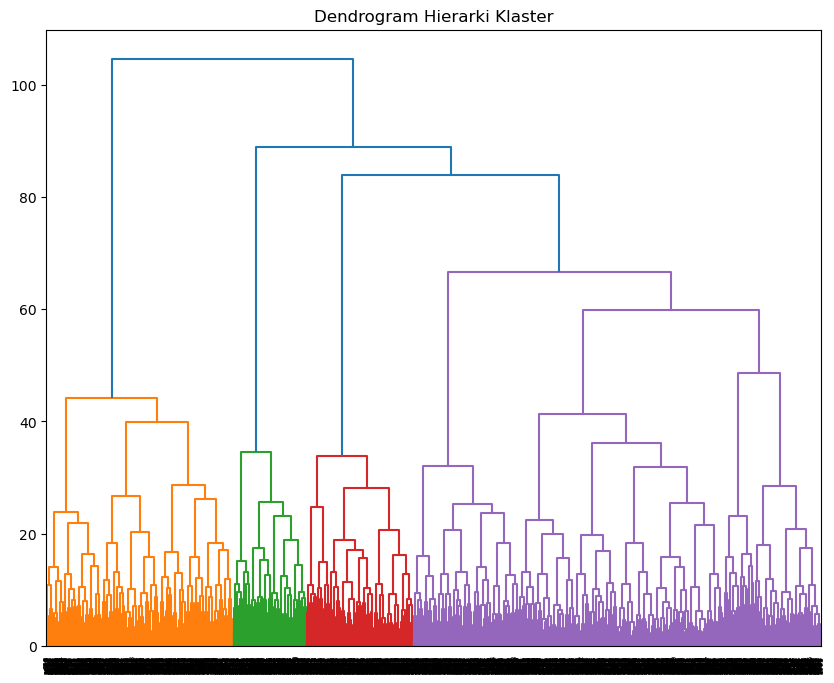

In [46]:
# membuat grafik dendogram
plt.figure(figsize=(10, 8))  
dendrogram(linked, orientation='top')
plt.title('Dendrogram Hierarki Klaster')
plt.show()

### Membuat Klaster Pelanggan

In [47]:
# membuat model pengklasteran
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels

C:\Users\Adam\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [48]:
# melihat rata-rata klaster pelanggan
df.groupby('Cluster').mean().applymap("{0:.2f}".format)

gender Near_Location Partner Promo_friends Phone Contract_period  \
Cluster                                                                    
0         0.50          0.96    0.78          0.57  1.00           10.89   
1         0.52          0.86    0.47          0.31  0.00            4.79   
2         0.50          0.00    0.46          0.08  1.00            2.35   
3         0.49          1.00    0.35          0.24  1.00            1.95   
4         0.56          0.98    0.36          0.23  1.00            2.67   

        Group_visits    Age Avg_additional_charges_total  \
Cluster                                                    
0               0.54  29.98                       160.76   
1               0.43  29.30                       143.96   
2               0.22  28.48                       135.46   
3               0.34  28.17                       131.62   
4               0.47  30.13                       161.66   

        Month_to_end_contract Lifetime Avg_class_frequency_total  \
Cluster                                                            
0                        9.95     4.74                      1.98   
1                        4.48     3.92                      1.85   
2                        2.20     2.81                      1.66   
3                        1.86     2.44                      1.25   
4                        2.46     4.90                      2.85   

        Avg_class_frequency_current_month Churn  
Cluster                                          
0                                    1.97  0.03  
1                                    1.72  0.27  
2                                    1.48  0.44  
3                                    1.01  0.51  
4                                    2.85  0.07

Beberapa kesimpulan yang dapat ditarik yaitu:
- Klaster 0 memiliki tingkat kontrak yang lebih tinggi (10.89 bulan), usia yang sedikit lebih tinggi (29.98 tahun), dan tingkat kehadiran kelompok yang lebih tinggi (0.54) dibandingkan dengan klaster lainnya. Tingkat churn sangat rendah (0.03%).
- Klaster 1 memiliki tingkat kehadiran kelompok yang rendah (0.43), tingkat kontrak yang lebih rendah (4.79 bulan), dan tingkat churn yang cukup tinggi (27%).
- Klaster 2 memiliki tingkat kontrak yang sangat rendah (2.35 bulan), usia yang lebih muda (28.48 tahun), dan tingkat churn yang sangat tinggi (44%).
- Klaster 3 memiliki tingkat kontrak yang rendah (1.95 bulan), usia yang lebih tua (28.17 tahun), dan tingkat churn yang tinggi (51%).
- Klaster 4 memiliki tingkat kehadiran kelompok yang tinggi (0.47), tingkat kontrak yang cukup tinggi (2.67 bulan), dan tingkat churn yang rendah (7%).

In [35]:
# membagi data churn dan stay
df_cluster = df.drop(['Churn', 'Cluster'], axis=1)
df_churn = df[df['Churn']==1]
df_stay = df[df['Churn']==0]

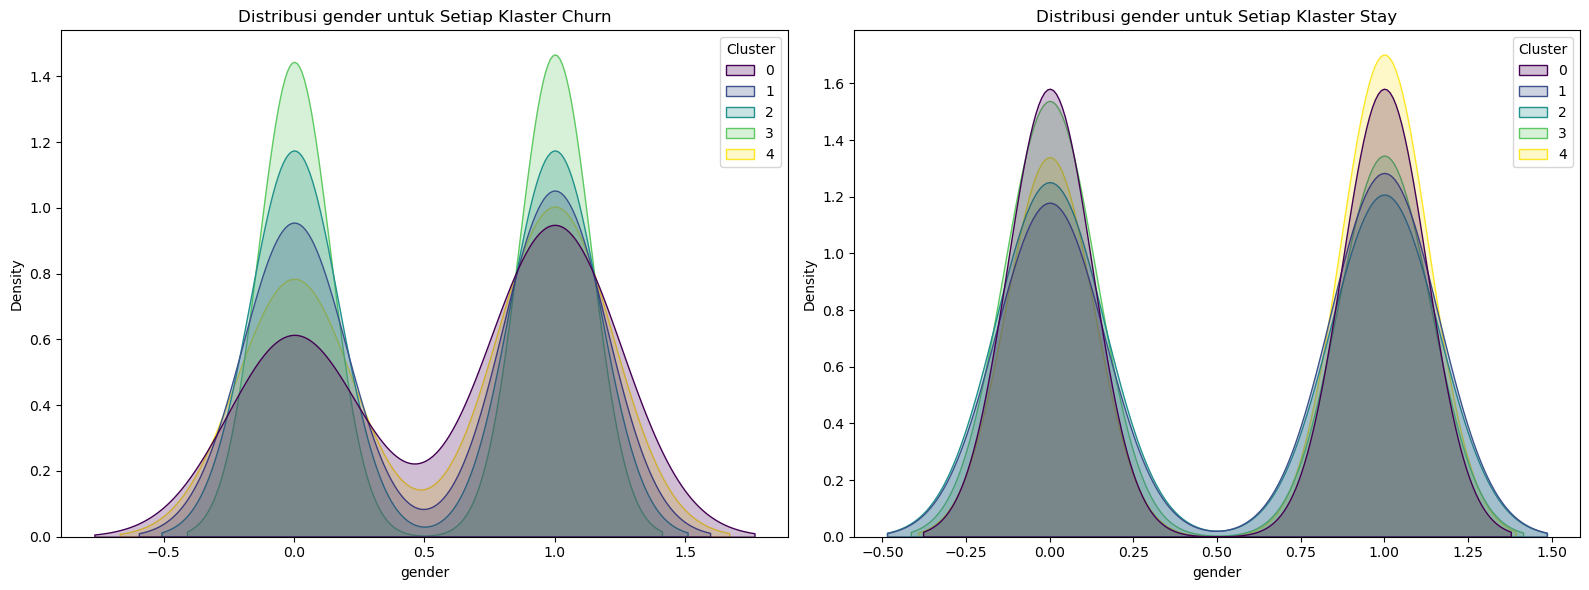

C:\Users\Adam\AppData\Local\Temp\ipykernel_5788\554043112.py:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Adam\AppData\Local\Temp\ipykernel_5788\554043112.py:10: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



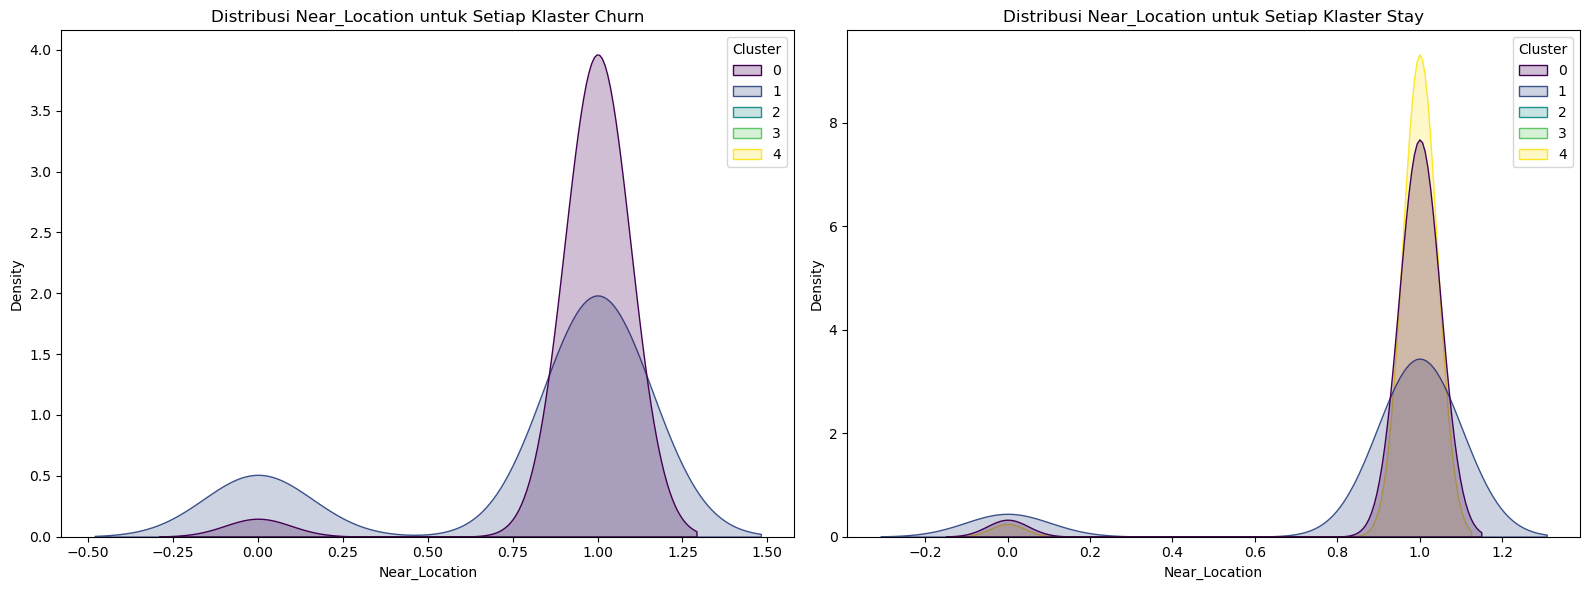

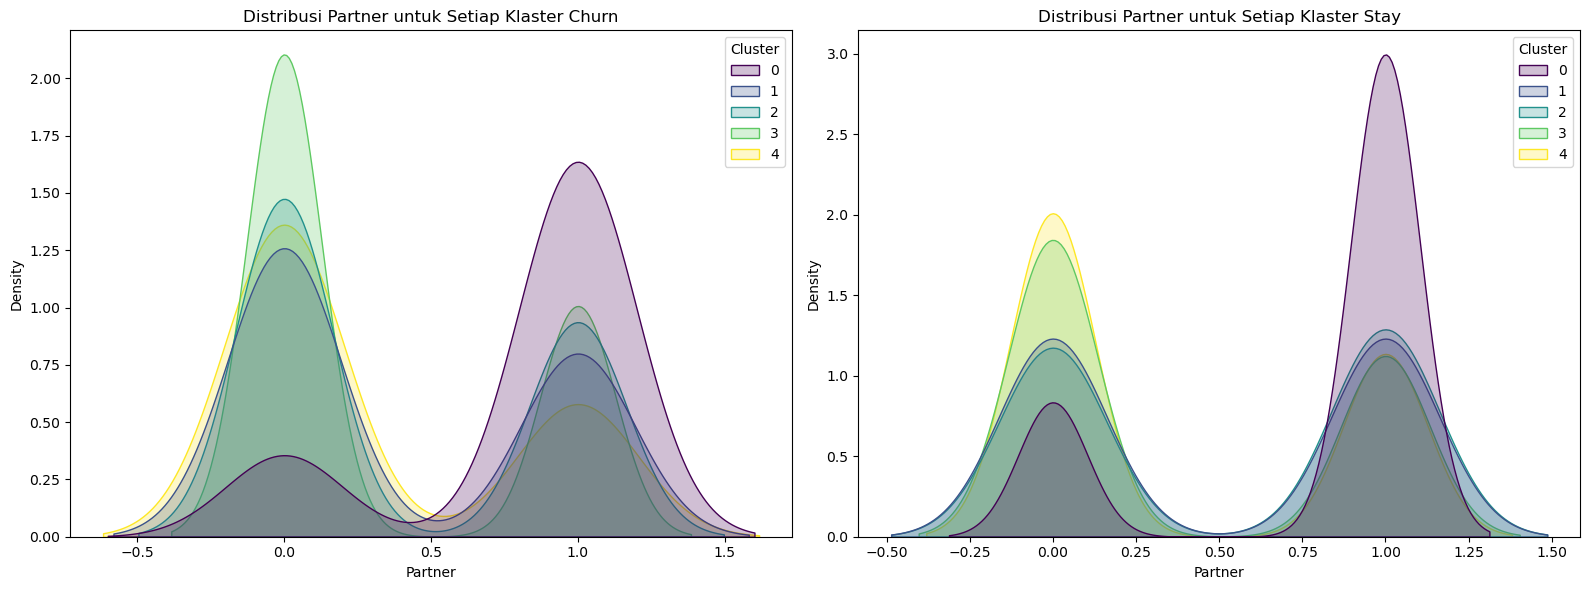

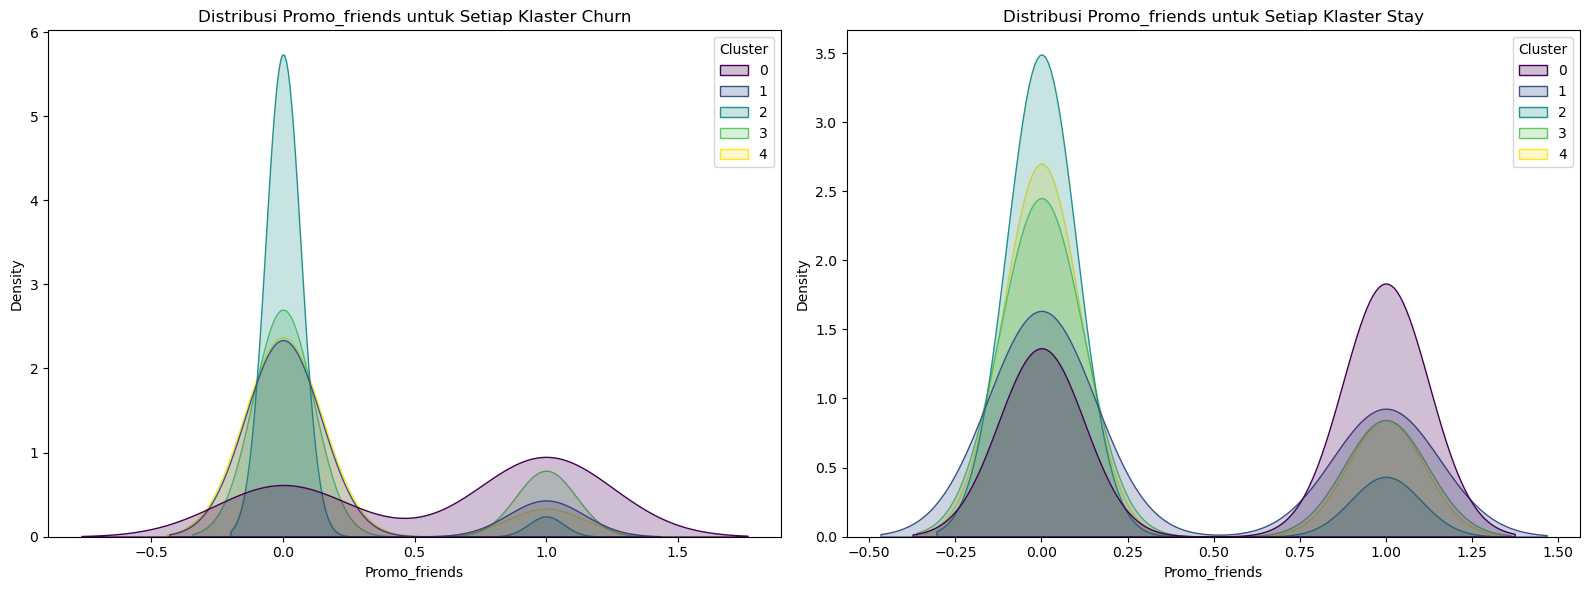

C:\Users\Adam\AppData\Local\Temp\ipykernel_5788\554043112.py:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Adam\AppData\Local\Temp\ipykernel_5788\554043112.py:10: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



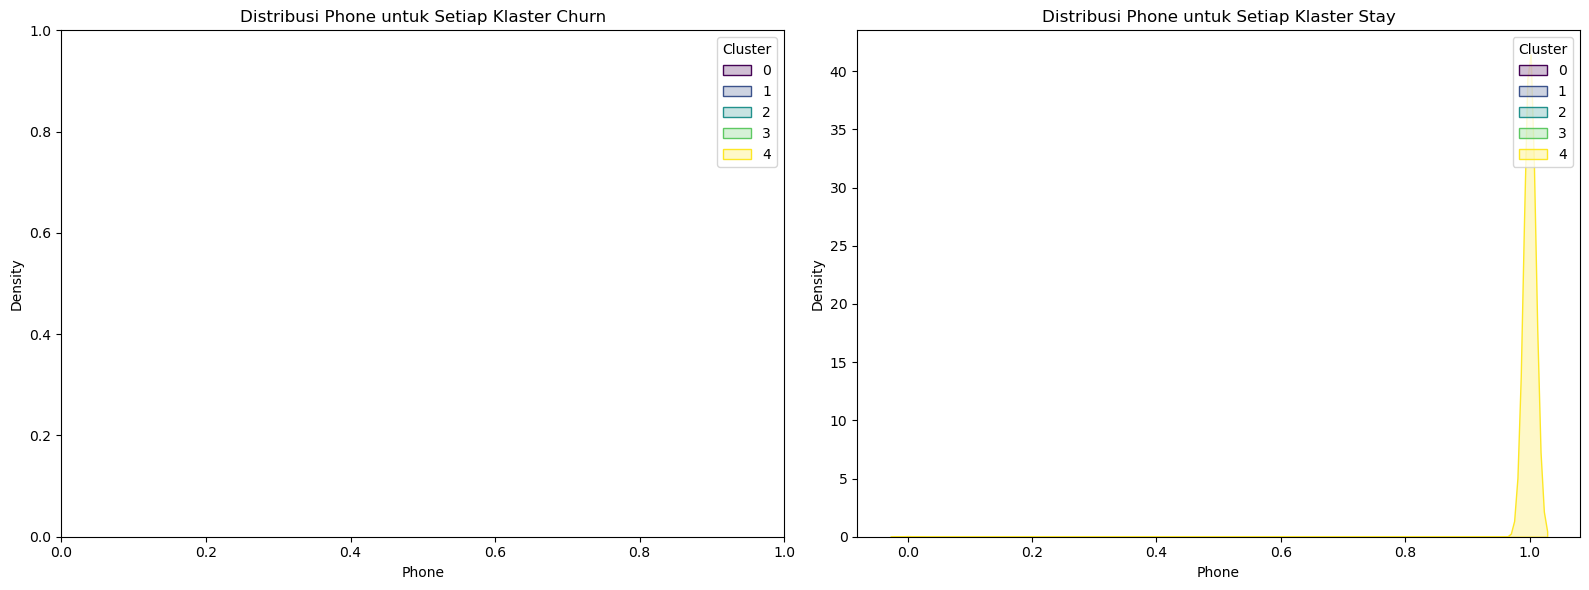

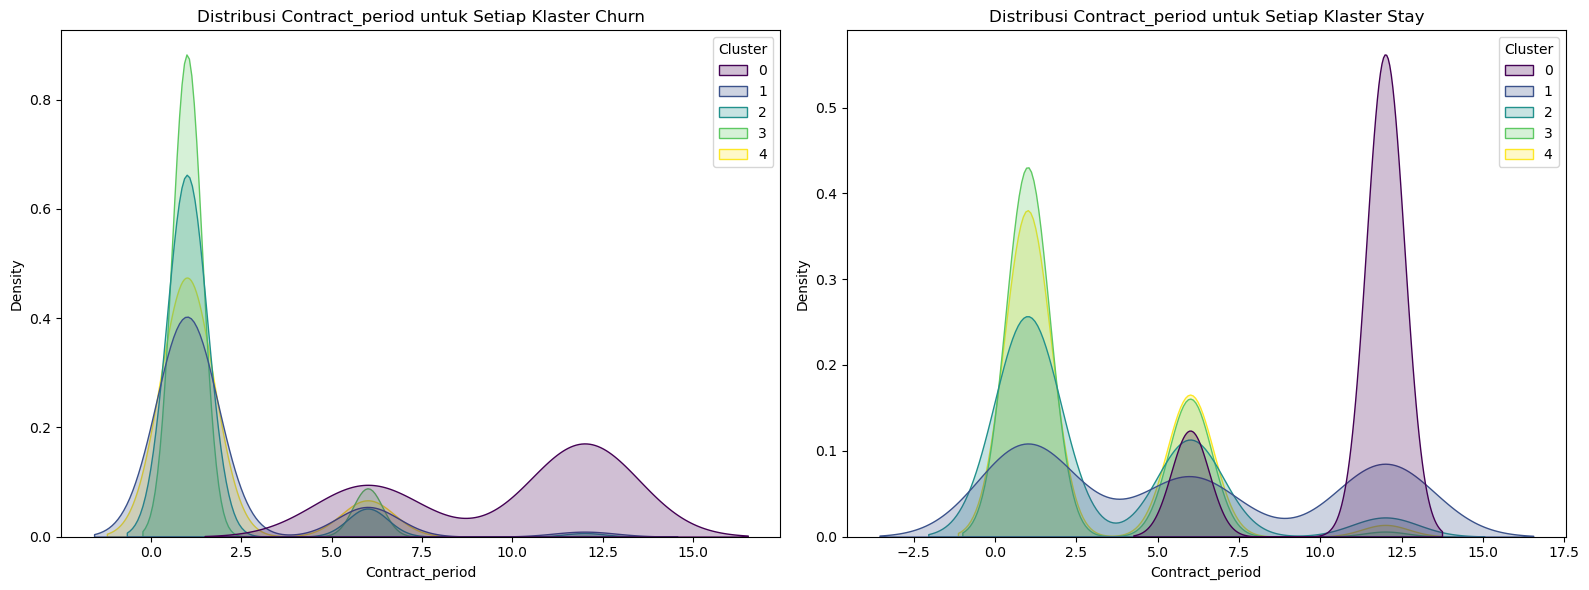

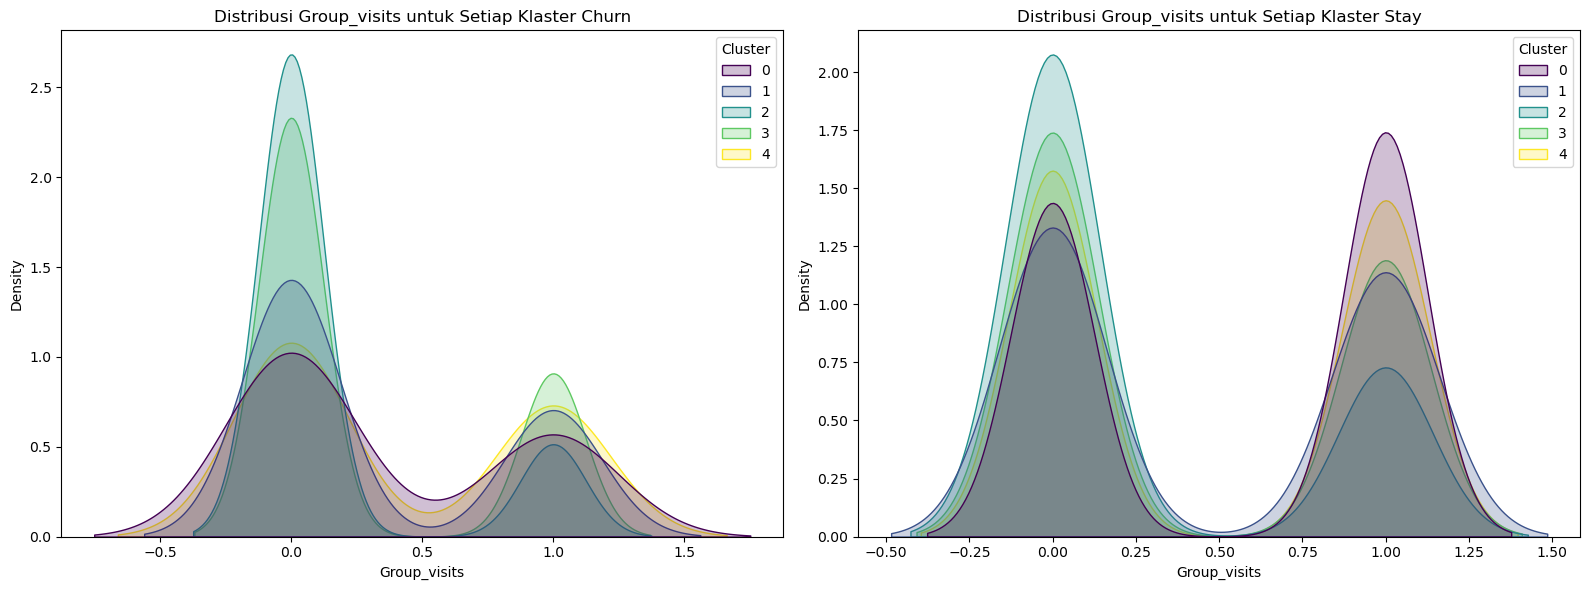

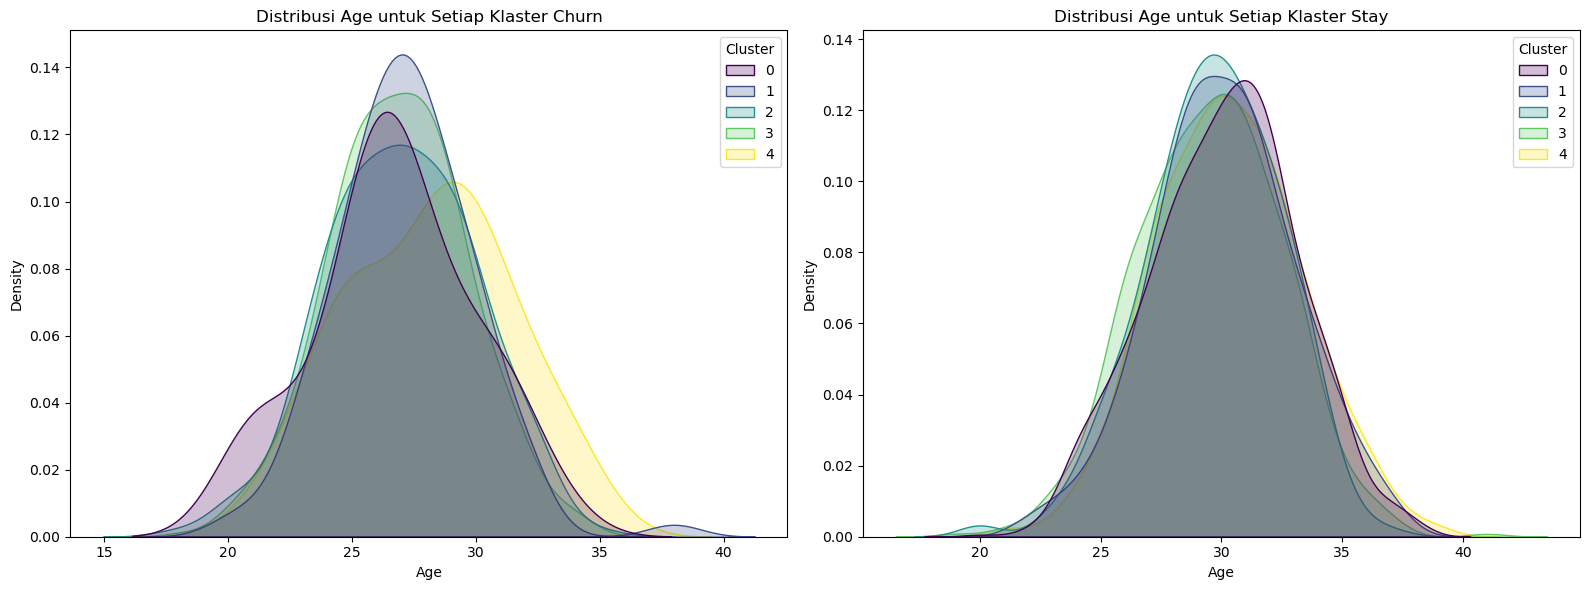

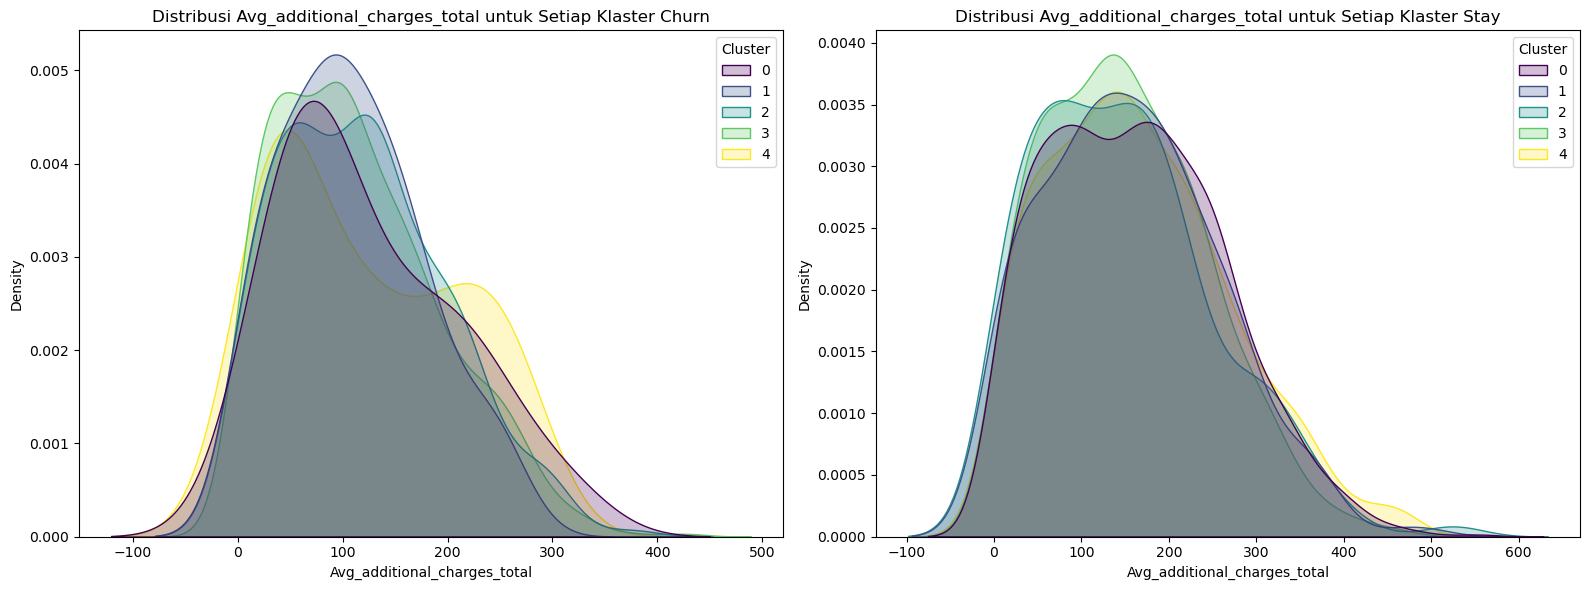

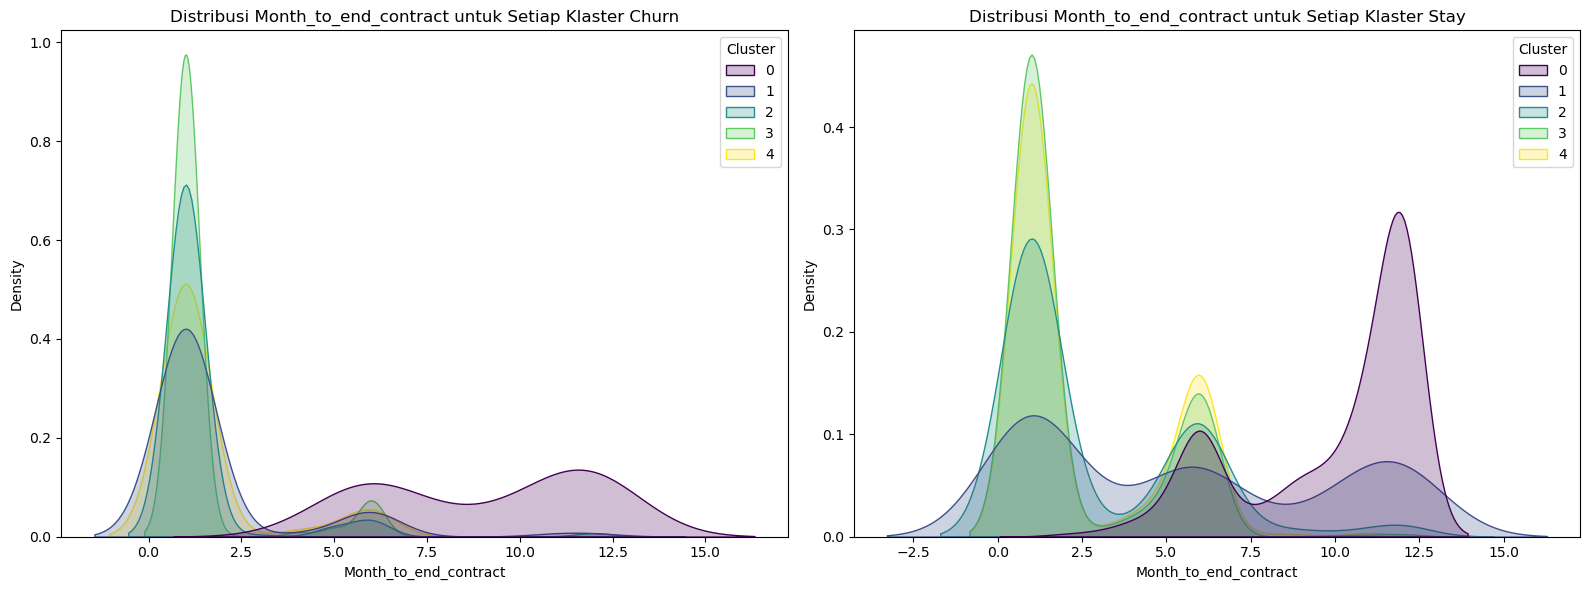

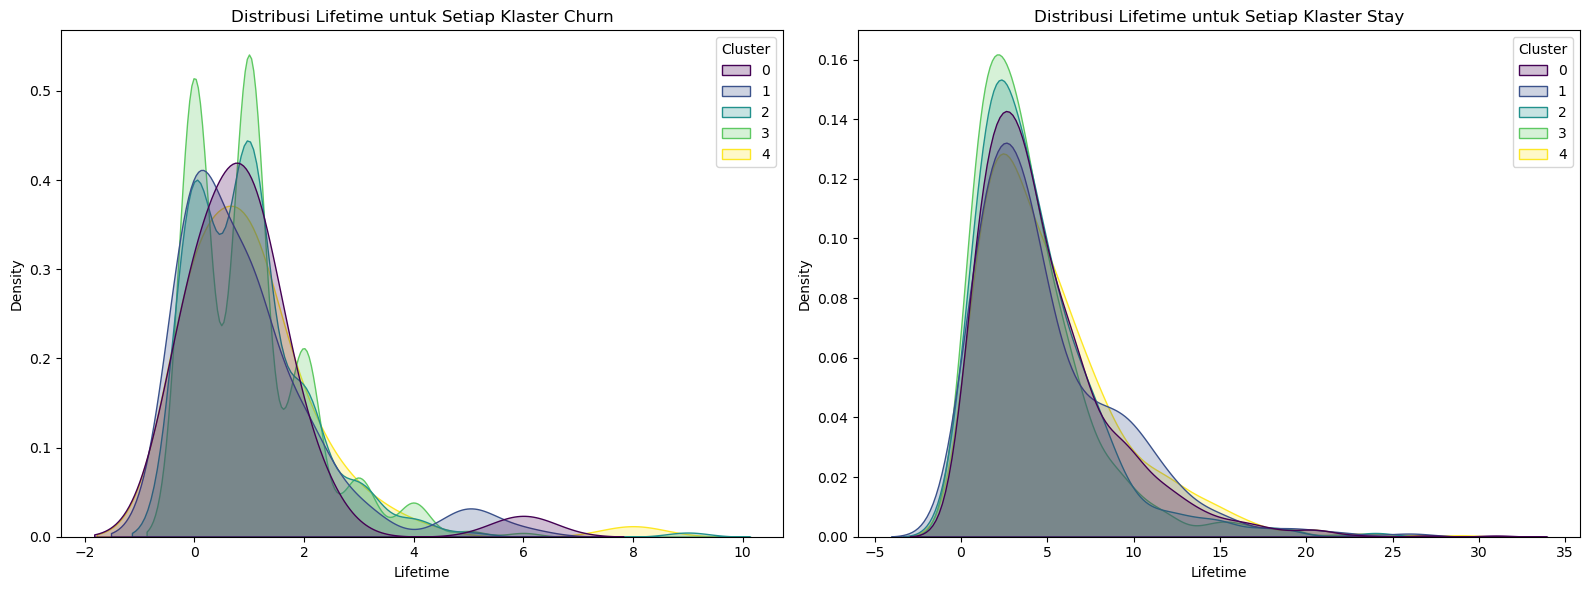

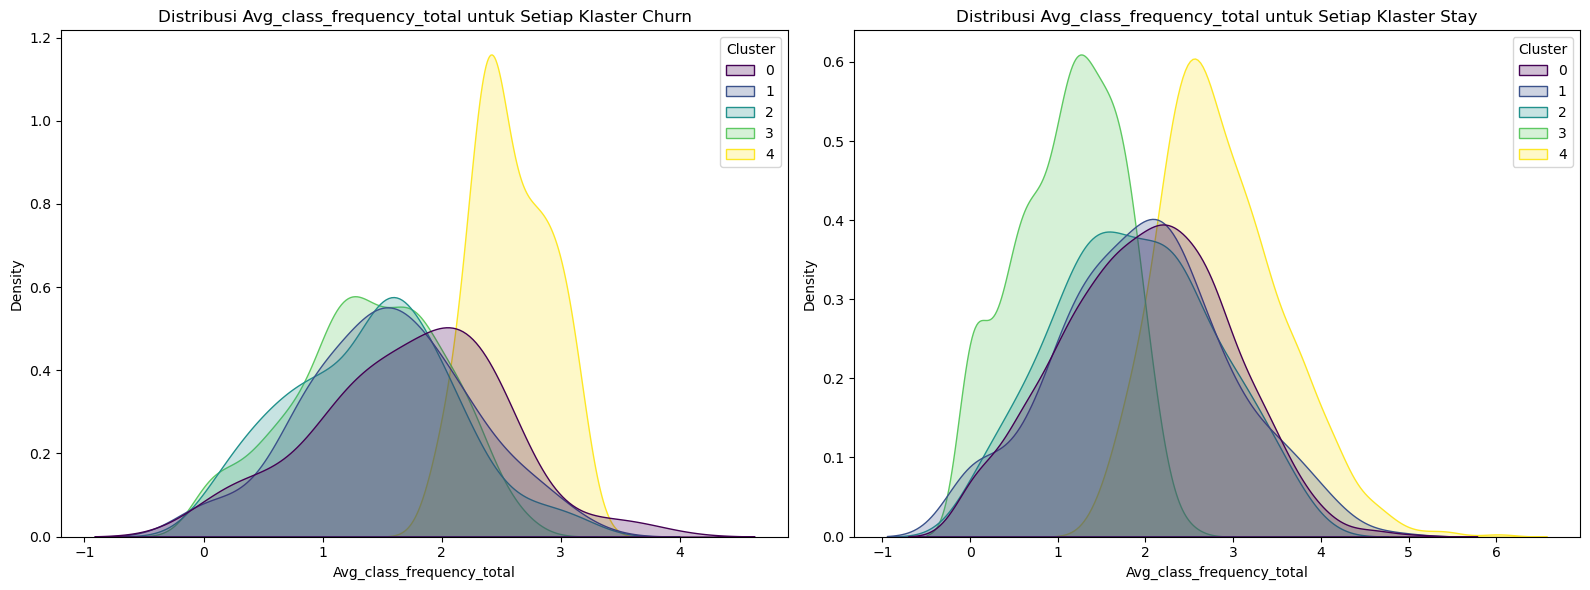

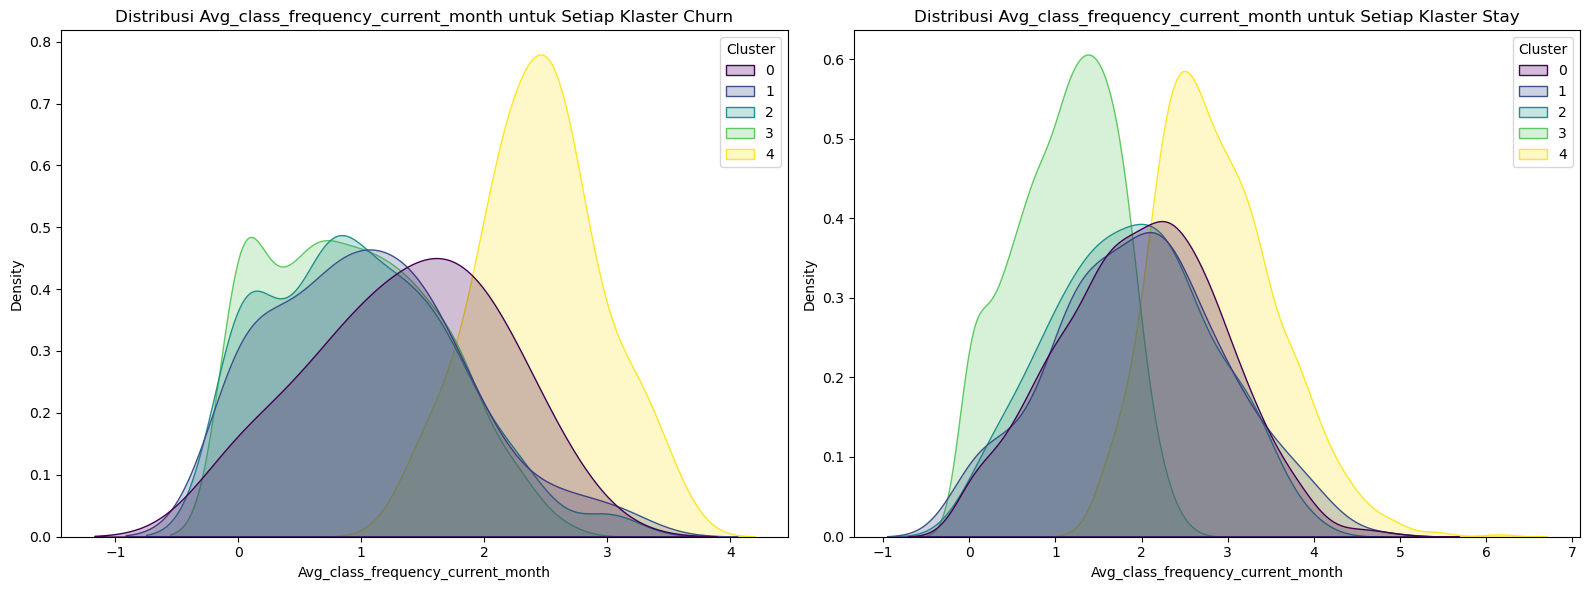

In [36]:
# membuat grafik distribusi tiap klaster
for column in df.drop(['Churn', 'Cluster'], axis=1).columns:
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data=df_churn, x=column, hue='Cluster', common_norm=False, fill=True, palette='viridis')
    plt.title(f'Distribusi {column} untuk Setiap Klaster Churn')
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=df_stay, x=column, hue='Cluster', common_norm=False, fill=True, palette='viridis')
    plt.title(f'Distribusi {column} untuk Setiap Klaster Stay')
    
    plt.tight_layout()
    plt.show()
    print()

In [37]:
# menghitung rata-rata nilai tiap klaster
churn_rate = pd.DataFrame(
    {
        'Cluster': df.groupby(['Cluster']).mean().index,
        'Churn_rate': df.groupby(['Cluster'])['Churn'].mean()
    }
).reset_index(drop=True)

churn_rate['Churn_rate, %'] = churn_rate['Churn_rate'].map('{:.2%}'.format)
churn_rate

Cluster  Churn_rate Churn_rate, %
0        0    0.027723         2.77%
1        1    0.267532        26.75%
2        2    0.443564        44.36%
3        3    0.514263        51.43%
4        4    0.068019         6.80%

Dari tabel di atas dapat diketahui bahwa:
- Cluster 0: Tingkat churn sangat rendah (2.77%). Pelanggan di klaster ini cenderung tetap setia.
- Cluster 1: Tingkat churn tinggi (26.75%). Pelanggan di klaster ini memiliki kecenderungan untuk pergi.
- Cluster 2: Tingkat churn sangat tinggi (44.36%). Pelanggan di klaster ini sangat mungkin untuk pergi.
- Cluster 3: Tingkat churn sangat tinggi (51.43%). Pelanggan di klaster ini memiliki tingkat churn tertinggi.
- Cluster 4: Tingkat churn rendah (6.80%). Pelanggan di klaster ini cenderung tetap setia.

## Kesimpulan Umum
Berdasarkan analisis data eksploratif, berikut beberapa kesimpulan umumnya yaitu:
- Pelanggan dengan periode kontrak yang lebih panjang cenderung memiliki loyalitas yang lebih tinggi dan risiko churn yang lebih rendah.
- Tingginya frekuensi kehadiran dalam sesi grup berkorelasi dengan retensi yang lebih baik.
- Pelanggan yang direkomendasikan oleh teman cenderung memiliki tingkat retensi yang lebih tinggi.
- Pengklasteran data menunjukkan adanya segmen pelanggan dengan tingkat churn tinggi yaitu klaster 2 dan 3. 

## Rekomendasi Bisnis
Untuk membangun brand yang baik serta untuk meningkatkan retensi pelanggan secara signifikan dan mengurangi tingkat churn pada kelompok yang paling berisiko berikut beberapa strategi yaitu:
- Berikan diskon atau insentif bagi pelanggan yang memperpanjang kontrak ke jangka waktu lebih lama serta tawarkan paket keanggotaan tahunan dengan harga lebih kompetitif atau manfaat tambahan seperti sesi personal trainer gratis. Hal ini bertujuan untuk menarik minat pelanggan dengan periode kontrak yang pendek. Dengan mengirimkan pengingat dan informasi manfaat dari kontrak jangka panjang kepada pelanggan mendekati masa berakhir kontrak, sehingga mereka terdorong untuk memperbarui keanggotaan.
- Selalu promosikan kelas grup melalui email, aplikasi, atau media sosial. Membuat kelas trial gratis kepada pelanggan baru serta untuk meningkatkan interaksi pelanggan. Selalu memberikan poin atau reward setiap kali pelanggan mengikuti sesi grup atau kelas tertentu sehingga pelanggan merasa lebih terhubung dan termotivasi untuk tetap aktif.
- Tawarkan bonus atau diskon bagi pelanggan yang berhasil merekomendasikan teman untuk bergabung yaitu program 'refer a friend'. Lalu berikan penghargaan baik kepada pelanggan yang mereferensikan maupun kepada teman baru yang mendaftar, sehingga kedua belah pihak merasa diuntungkan.
- Melakukan pendekatan khusus kepada pelanggan di klaster 2 dan 3 secara proaktif dengan program loyalitas atau penawaran eksklusif. Seperti meluncurkan program mentoring atau buddy system agar mereka lebih terlibat. Lakukan pemantauan perilaku pelanggan secara rutin, dan lakukan intervensi seperti follow-up atau penawaran khusus ketika ada tanda-tanda penurunan aktivitas.

Dengan demikian beberapa rekomendasi bisnis di atas, perusahaan dapat membangun strategi interaksi yang lebih efektif dan meningkatkan retensi pelanggan secara berkelanjutan.